**Assignment 5 (6)**

We're going to adapt the code at the end of the paper ([4]) from Matlab to python.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import matlib as mb

This function takes in a matrix of data and returns the following:

signaldata - the projection of the mean values of the data

sigdatorig - the projection of the original(non-mean'd) data matrix

sortedvals - Variance values (eigenvalues), sorted from greatest to least

sortedvecs - Principal Components (eigenvectors), order corresponds to the sorted vals list

In [2]:
def PCA(datamatrix):
    
    rows = len(datamatrix)
    cols = len(datamatrix[0])
    
    means = np.mean(datamatrix, axis = 1)
    
    meansmatrix = np.column_stack(mb.repmat(means,cols,1))
    
    meansminus = np.matrix(datamatrix - meansmatrix)
    
    cov = np.cov(meansminus)
    
    vals, cvecs = np.linalg.eig(cov)
    
    npvals = np.array(vals)
    
    eigindex = np.argsort(-1 * npvals)
    
    sortedvals = np.zeros(rows)
    
    sortedvecs = np.zeros((rows,rows))
    
    for i, index in enumerate(eigindex):
        
        sortedvals[i] = vals[index]
        
        for j in range(rows):
        
            sortedvecs[j,i] = cvecs[j,index]
    
    vecsmatrix = np.matrix(sortedvecs)
    
    dmatrix = np.matrix(datamatrix)
    
    sigdatorig = np.dot(vecsmatrix.getH(), dmatrix)
    
    signaldata = np.dot(vecsmatrix.getH(), meansminus)
    
    return(signaldata, sigdatorig, sortedvals, sortedvecs)

In [3]:
#computes n randomized x values between -maxminx and maxminx
#then returns y values based on the equation y = m*x + b
#then reports x and y, both with random error tacked on
#the maximum random error is determined by maxerrorx and maxerrory

def lindata(n, m, b, maxminx, maxerrorx, maxerrory):
    
    xtrue = np.random.uniform(-maxminx, maxminx, n)
    ytrue = m * xtrue + b
    
    xerror = np.random.uniform(-maxerrorx, maxerrorx, n)
    yerror = np.random.uniform(-maxerrory, maxerrory, n)
    
    xobs = xtrue + xerror
    yobs = ytrue + yerror
    
    return(xobs,yobs)

In [4]:
#same inputs as lindata except n, m, b, and maxmin are now arrays with the values for the 3 cameras
def threecameras(nA, mA, bA, maxminxA, maxerrorx, maxerrory):
    
    c1x, c1y = lindata(nA[0],mA[0], bA[0], maxminxA[0], maxerrorx, maxerrory)
    
    c2x, c2y = lindata(nA[1],mA[1], bA[1], maxminxA[1], maxerrorx, maxerrory)
    
    c3x, c3y = lindata(nA[2],mA[2], bA[2], maxminxA[2], maxerrorx, maxerrory)
   
    return(c1x,c1y,c2x,c2y,c3x,c3y)

In [5]:
onesimx, onesimy = lindata(500, 2.5, 32, 25, 2, 4)
onesimmatrix = [onesimx,onesimy]
sigdat1s, sigdatorig1s, svals1s, svecs1s = PCA(onesimmatrix)

In [6]:
#svecs1s.shape
print(svecs1s)

[[-0.36993269 -0.92905856]
 [-0.92905856  0.36993269]]


The principal components are as listed above. Time to plot!

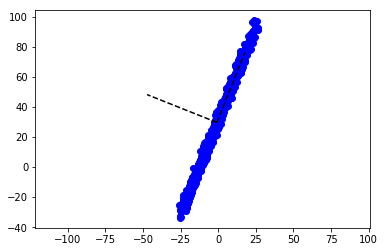

In [7]:
plt.figure()
m1s = np.mean(onesimmatrix,axis=1)

plt.plot(onesimx,onesimy, 'ob')

plt.plot([0, -50 * svecs1s[0,0]] + m1s[0], [0, -50*svecs1s[0,1]] + m1s[1], '--k')
plt.plot([0, 50 * svecs1s[1,0]] + m1s[0], [0, 50*svecs1s[1,1]] + m1s[1], '--k')

plt.axis('equal')
plt.show()

In [8]:
nArray1 = [20,20,20]
mArray1 = [-3,12,0.5]
bArray1 = [50,-16,3]
maxminxArray1 = [10,4,40]

c1x,c1y,c2x,c2y,c3x,c3y = threecameras(nArray1, mArray1, bArray1, maxminxArray1, 0.5, 5)

threecameramatrix = [c1x,c1y,c2x,c2y,c3x,c3y]
    
sigdat3c, sigdatorig3c, svals3c, svecs3c = PCA(threecameramatrix)

In [9]:
print(svecs3c)

[[ 0.07175254  0.02395549  0.32827495 -0.07446978  0.92061821  0.18283769]
 [-0.24062298 -0.07347679 -0.90652183  0.01613962  0.33255304  0.06378018]
 [-0.05316766  0.05814302  0.00943583 -0.04503978  0.18977329 -0.97757919]
 [-0.68512182  0.71372907  0.12010704 -0.01623388 -0.02457728  0.07684806]
 [-0.61631784 -0.61761833  0.22788147  0.43132784  0.02107469 -0.01679584]
 [-0.29135162 -0.31588779  0.06331693 -0.8976959  -0.06934332  0.02556701]]


These are the principal components of the 3 camera problem for the parameters set above.

As far as I can tell, the set doesn't actually want me to plot these principal components, which is good, because I don't actually know how to/know if it's possible to make that work on a 2d plot. Here's the plot of the simulated data though.

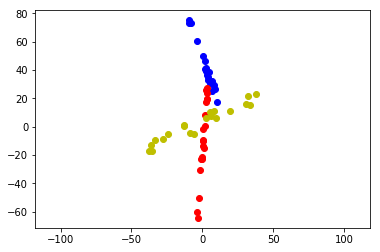

In [10]:
plt.figure()

plt.plot(c1x,c1y, 'ob',)
plt.plot(c2x,c2y, 'or',)
plt.plot(c3x,c3y, 'oy',)

plt.axis('equal')
plt.show()